In [1]:
#This program uses the gyro and some known measurements on Zumi
#such as the wheel diameter and length between wheel to wheel
#to determine the Rotation per second of each motor at a set speed
#do note that varying battery/power levels will result in
#different Rotation per second

from zumi.zumi import Zumi
import matplotlib.pyplot as plt
import numpy as np
import time
import math

zumi = Zumi()

def calc_motor_data(motor,time_out=0.5,set_speed=40,graphs=False,
                    wheel_2_wheel_dist = 6.3,wheel_rad = 1.5):
    zumi.reset_gyro()

    time_list = []
    gyro_list = []
    batt_list = []

    #reset variables
    ang_speed_list = []
    init_time = time.time()
    time_passed = 0
    
    try:
        #turn left motor ---------------------
        while(True):
            time_passed = time.time()-init_time
            if motor == "LEFT":
                zumi.control_motors(0,set_speed)
            elif motor =="RIGHT":
                zumi.control_motors(set_speed,0)
            else:
                print("please select a motor")
                break
            
            current_angle = zumi.update_angles()[2]
            ang_speed_list.append(zumi.mpu_list[5])
            time_list.append(time.time())
            gyro_list.append(current_angle) 
            batt_list.append(zumi.get_battery_voltage())

            if time_passed >= time_out:
                break  
            if abs(current_angle)>359:
                break
    finally:
        zumi.stop()

        wheel_circumference = 2*math.pi*wheel_rad
        
        arc_length = abs(2*math.pi*current_angle/360*wheel_2_wheel_dist)
        num_turns = arc_length/wheel_circumference
        rps = num_turns/time_passed
        avg_ang_speed = sum(ang_speed_list)/len(ang_speed_list)
        wheel_speed = rps*wheel_circumference
        try:
            if graphs == True:
                plt.plot(time_list,gyro_list,'go')
                plt.ylabel('gyro')
                plt.xlabel('time')
                plt.show()

                plt.plot(time_list,batt_list,'go')
                plt.ylabel('battery')
                plt.xlabel('time')
                plt.show()
        except:
            pass
        
    return [rps,wheel_speed,arc_length,num_turns,avg_ang_speed]

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected


In [2]:
data = calc_motor_data("LEFT",set_speed=40)
print("LEFT MOTOR")
print("motor ",int(data[0]*100)/100, "rotations per second")
print("motor speed ",int(data[1]*100)/100, "cm/s")

LEFT MOTOR
motor  1.82 rotations per second
motor speed  17.17 cm/s


In [ ]:
print(calc_motor_data("LEFT",set_speed=40))
zumi.stop()
time.sleep(1)

# print(calc_motor_data("LEFT",set_speed=-40))
# zumi.stop()
# time.sleep(1)

# print(calc_motor_data("RIGHT",set_speed=40))
# zumi.stop()
# time.sleep(1)

# print(calc_motor_data("RIGHT",set_speed=-40))
# zumi.stop()
# time.sleep(1)

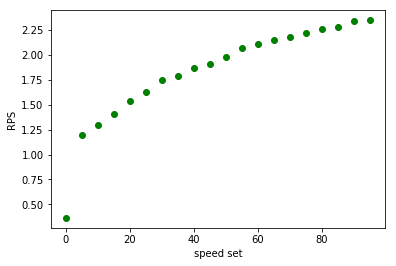

In [18]:
rps_list = []
speed_list = []

for i in range(20):
    speed_now = 5*i
    rps = calc_motor_data("LEFT",set_speed=speed_now)[0]
    speed_list.append(speed_now)
    rps_list.append(rps)
    zumi.stop()
    time.sleep(0.7)
        
plt.plot(speed_list,rps_list,'go')
plt.ylabel('RPS')
plt.xlabel('speed set')
plt.show()
left_rps_list = rps_list

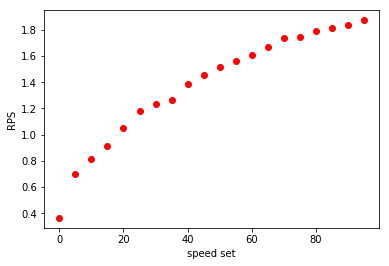

In [19]:
rps_list = []
speed_list = []

for i in range(20):
    speed_now = 5*i
    rps = calc_motor_data("RIGHT",set_speed=speed_now)[0]
    speed_list.append(speed_now)
    rps_list.append(rps)
    zumi.stop()
    time.sleep(0.7)
        
plt.plot(speed_list,rps_list,'ro')
plt.ylabel('RPS')
plt.xlabel('speed set')
plt.show()
right_rps_list = rps_list

In [8]:
print(left_rps_list)

[0.3644688691325602, 1.1133462484651029, 1.2961062208365186, 1.3928061446055042, 1.5283919488305608, 1.6245997079739427, 1.7050469794482581, 1.7969962768138799, 1.8371179461124427, 1.9274151666418367, 2.009898627336181, 2.0379839436594223, 2.08131677717101, 2.1474271149668773, 2.151265612155609, 2.2348529294851134, 2.2473686699072473, 2.257350621183413, 2.32636561951719, 2.342168425463928]


In [9]:
print(right_rps_list)

[0.3655048737928535, 0.709685340278386, 0.8285248643443919, 0.953030232358656, 1.057244057320576, 1.1510028782577955, 1.2370696728209187, 1.2972955726140878, 1.3842570387803725, 1.4365855756430075, 1.4732365371600462, 1.54213841830638, 1.6081577897312735, 1.6555994884830685, 1.680275500604315, 1.75141717630721, 1.7606962914221662, 1.747754684050249, 1.8281037090024042, 1.5850694187123866]


In [17]:
for i in range(100):
    zumi.control_motors(20,35)
zumi.stop()